Written by Yair Mau. Check out my webpage for more tutorials: http://www.yairmau.com/

In [1]:
#import stuff
import numpy
import matplotlib.pyplot as plt
import scipy.special
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
%matplotlib inline

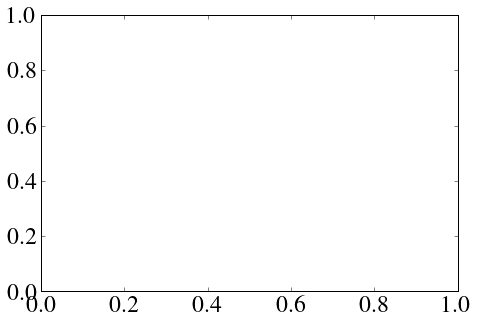

In [2]:
# configure plotting preferences

# http://wiki.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
pts_per_inch=72.27       # this is a latex constant, don't change it.
text_width_in_pts=246.0  # write "\the\textwidth" (or "\showthe\columnwidth" for a 2 collumn text)
                         # inside a figure environment in latex, the result will be on the dvi/pdf next to the figure. See url above.
text_width_in_inches=text_width_in_pts/pts_per_inch
golden_ratio=0.618       # make rectangles with a nice proportion
inverse_latex_scale=2    # figure.png or figure.eps will be intentionally larger, because it is prettier
                         # when compiling latex code, use \includegraphics[scale=(1/inverse_latex_scale)]{figure}
fig_proportion = (1.0) # we want the figure to occupy 2/3 (for example) of the text width
csize=inverse_latex_scale*fig_proportion*text_width_in_inches
fig_ratio = 1.2
fig_size=(1.0*csize,fig_ratio*csize)  # always 1.0 on the first argument
fig=plt.figure(1,figsize=fig_size)     # figsize accepts only inches. if you rather think in cm, change the code yourself.
fig.clf()

class Positions:
    pass
pos = Positions()
pos.top    = 0.97
pos.bottom = 0.50
pos.left   = 0.13
pos.right  = 0.98
pos.hspace = 0.00
pos.wspace = 0.02
fig.subplots_adjust(top=pos.top,bottom=pos.bottom,left=pos.left,right=pos.right,hspace=0.00,wspace=0.03)
ax=fig.add_subplot(111)

text_size=inverse_latex_scale*12  # find out the fontsize of your latex text, and put it here
tick_size=inverse_latex_scale*8
# learn how to configure: http://matplotlib.sourceforge.net/users/customizing.html
params = {'backend': 'ps',
          'axes.labelsize': text_size,
          #'axes.linewidth' : 0,
          'text.fontsize': text_size,
          'legend.fontsize': text_size,
          'legend.handlelength': 2.5,
          'legend.borderaxespad': 0,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'font.family':'serif',
          'font.size': text_size,
          'font.serif':['Times'], # Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman
          'ps.usedistiller': 'xpdf',
          #'text.latex.preamble' : [ '\usepackage{mathptmx}'], # include here any neede package for latex; times roman fonts for math
          #'mathtext.fontset': 'stixsans',
          'text.usetex': True,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

plt.hold('on')

In [3]:
# define functions

def beta_func(a, b):
    e1 = scipy.special.gamma(a)
    e2 = scipy.special.gamma(b)
    e3 = scipy.special.gamma(a + b)
    return (e1*e2)/e3

beta_dist = lambda x,a,b: (1.0/beta_func(a,b)) * x**(a-1.0) * (1-x)**(b-1.0)

## plot on the top

-c:9: RuntimeWarning: divide by zero encountered in power


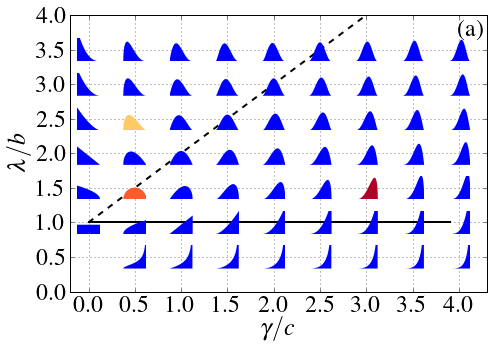

In [4]:
x = numpy.linspace(0,1,101)
Gamma = numpy.linspace(0,3.9,101) 
ax.plot(Gamma,numpy.ones(len(Gamma)),color='black',ls='-',lw=2)
ax.plot(Gamma,Gamma+1,color='black',ls='--',lw=2)

ax.set_xlabel(r"$\gamma/c$")
ax.set_ylabel(r"$\lambda/b$")

pos.x_min = -0.2
pos.x_max = 4.30
pos.y_min = 0.0
pos.y_max = 4.0
ax.axis([pos.x_min,pos.x_max,pos.y_min,pos.y_max])

ax.text(4.0,3.68,r'(a)',fontsize=text_size)

ax.set_xticks(numpy.arange(0,4.5,0.5))
ax.set_yticks(numpy.arange(0,4.5,0.5))

val = [(3.0,1.5),(0.5,1.5),(0.5,2.5)]

colormap = plt.cm.YlOrRd
colors = [colormap(i) for i in numpy.linspace(0.9, 0.3, 3)]

# complicated algorithm to place each tiny graph in the right place
def insert_window(ax,pos,pair,x,special=-1):
    size = 0.25
    ax2size = (size/(pos.x_max-pos.x_min)) * (pos.right-pos.left)
    pos_x_window = ((pair[0]-pos.x_min)/(pos.x_max-pos.x_min)) * (pos.right-pos.left) + pos.left - ax2size/2.0
    pos_y_window = ((pair[1]-pos.y_min)/(pos.y_max-pos.y_min)) * (pos.top-pos.bottom) + pos.bottom - ax2size/fig_ratio/2.0
    ax2 = fig.add_axes([pos_x_window, pos_y_window, ax2size, ax2size/fig_ratio],frameon=False)
    curve = beta_dist(x,pair[0]+1.0, pair[1])
    ax2.axis([0,1,0,2.5])
    if special<0.0:   # regular plot in blue
        ax2.fill_between(x, curve, y2=0, edgecolor='None', color='blue')
    else:             # special plot not in blue
        ax2.fill_between(x, curve, y2=0, edgecolor='None', color=colors[special])
    ax2.set_xticks([])
    ax2.set_yticks([])

pos.pt_x = 1.0
pos.pt_y = 1.0

pairs = []

for gam in numpy.append([0.0],numpy.arange(0.5,4.5,0.5)):
    for lam in numpy.arange(1.0,4.0,0.5):
        if gam==val[0][0] and lam==val[0][1]  or  gam==val[1][0] and lam==val[1][1]  or  gam==val[2][0] and lam==val[2][1]:
            pass
        else:
            pairs.append((gam,lam))

# draw all little distributions (not bottom row)
for i,pair in enumerate(pairs):
    insert_window(ax,pos,(pair[0],pair[1]),x)
# draw the three distributions with different colors
for i,pair in enumerate(val):
    insert_window(ax,pos,(pair[0],pair[1]),x,i)
# draw bottom row of little distributions
for pair_x in numpy.arange(0.5,4.5,0.5):
    insert_window(ax,pos,(pair_x,0.5),x)

ax.grid(True)

fig

## plot on the bottom

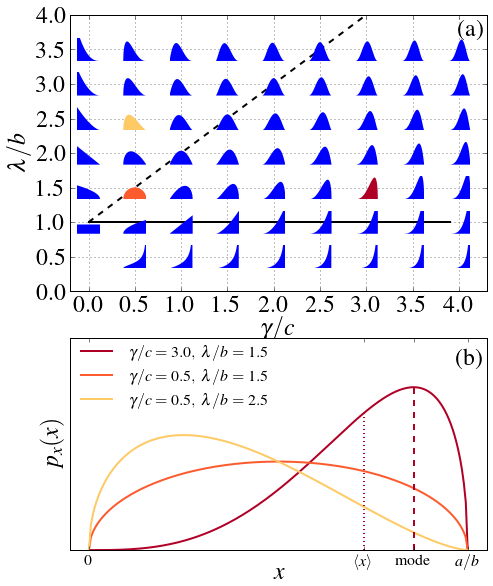

In [5]:
wspace = 0.05
rspace = 0.02

x = numpy.linspace(0,1,201)

ax_bottom = fig.add_axes([pos.left, 0.06, (pos.right-pos.left), 0.36])

mode = lambda gam,lam: gam / (gam+lam-1.0)
mean = lambda gam,lam: (gam+1.0)/(gam+lam+1.0)

maximum=0.0
for i,v in enumerate(val):
    curve = beta_dist(x, v[0]+1.0, v[1])
    maximum=numpy.max([maximum,numpy.max(curve)])
    ax_bottom.plot(x, curve, color=colors[i], lw=2)

g = val[0][0]
l = val[0][1]
ax_bottom.plot([mode(g,l),mode(g,l)],[0,beta_dist(mode(g,l),g+1.0, l)], color=colors[0], lw=2,ls='--')
ax_bottom.plot([mean(g,l),mean(g,l)],[0,beta_dist(mean(g,l),g+1.0, l)], color=colors[0], lw=2,ls=':')

ax_bottom.axis([-0.05,1.05*1,0,1.3*maximum])
ax_bottom.set_xticks([0.0,1.0,mode(g,l),mean(g,l)])
ax_bottom.set_xticklabels([r'$0$', r'$a/b$','mode',r'$\langle x\rangle$'],fontsize=tick_size)
ax_bottom.set_yticks([])
ax_bottom.set_xlabel(r"$x$",labelpad=-2)
ax_bottom.set_ylabel(r"$p_x(x)$")#,labelpad=3)
ax_bottom.legend([r'$\gamma/c={0:.1f},\,\, \lambda/b={1:.1f}$'.format(val[0][0],val[0][1]),
                  r'$\gamma/c={0:.1f},\,\, \lambda/b={1:.1f}$'.format(val[1][0],val[1][1]),
                  r'$\gamma/c={0:.1f},\,\, \lambda/b={1:.1f}$'.format(val[2][0],val[2][1]) ]
                  ,fontsize=tick_size,loc='upper left',frameon=False)
ax_bottom.text(0.97,2.65,r'(b)',fontsize=text_size)

fig

In [6]:
# save figure
fig.savefig("beta_modified.png",dpi=300)
fig.savefig("beta_modified.eps")